In [3]:
import sys

sys.path.append("..")

%load_ext autoreload
%autoreload complete

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import matplotlib.pyplot as plt
import xarray as xr
from xarray.core.alignment import align

from project.test_pendulum import *
from project.lim import LIM
from project.util import *

In [5]:
def make_dataset():
    tt, xx, yy = run_oscillator(t_end=800, sigma=0)

    ds = xr.Dataset(
        {
            "x": (["time"], yy[0, :]),
            "v": (["time"], yy[1, :]),
        },
        coords={"time": tt},
    )

    return ds, yy


ds, xx = make_dataset()
ds

G: [[ 0.99950037  0.09988342]
 [-0.00998834  0.99750271]]
Eigenvalues of G: [0.99850154+0.03157011j 0.99850154-0.03157011j]
L: [[ 0.    1.  ]
 [-0.1  -0.02]]
Eigenvalues of L: [-0.01+0.31606961j -0.01-0.31606961j]


<xarray.Dataset>
Dimensions:  (time: 8000)
Coordinates:
  * time     (time) float64 0.0 0.1 0.2 0.3 0.4 ... 799.6 799.7 799.8 799.9
Data variables:
    x        (time) float64 1.0 1.0 0.999 ... 5.958e-06 -0.0005729 -0.001151
    v        (time) float64 0.0 -0.01 -0.01998 ... -0.005789 -0.005778 -0.00576

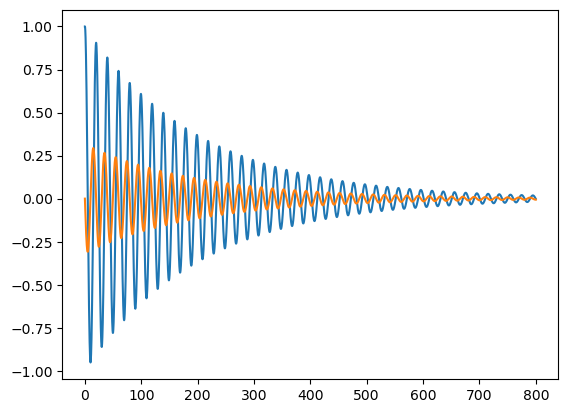

In [6]:
plt.plot(ds.time, ds["x"])
plt.plot(ds.time, ds["v"])

plt.show()

In [7]:
lim = LIM()
lim.fit(ds)
lim.print_properties()

G1: [[ 1.          0.09999999]
 [-0.01        0.998     ]]
Eigenvalues of G: [0.999+0.03160696j 0.999-0.03160696j]
L: [[ 0.00500416  1.00066709]
 [-0.10006672 -0.01500917]]
Eigenvalues of L: [-0.00500251+0.31628048j -0.00500251-0.31628048j]


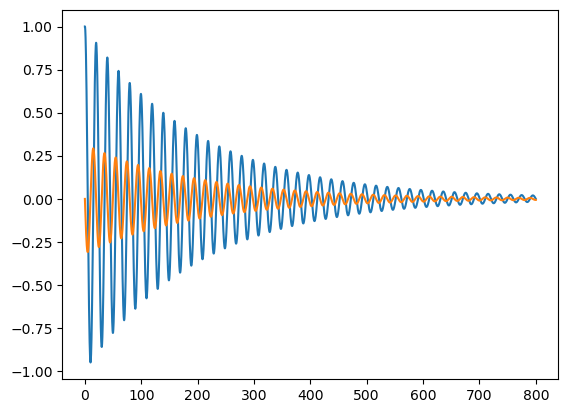

In [8]:
tt2, xx2 = lim.forecast_np(np.array([1, 0]), int(800 / 0.1))

plt.plot(tt2, xx2[0, :])
plt.plot(tt2, xx2[1, :])

plt.show()

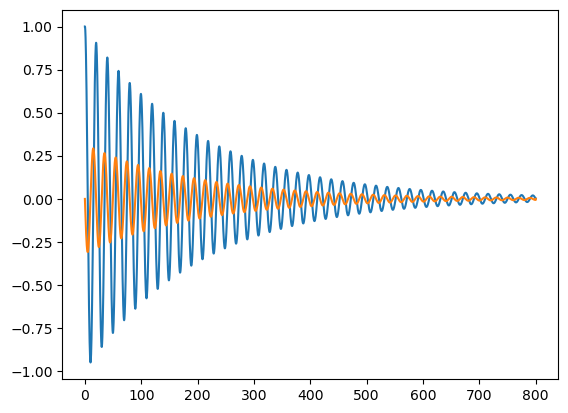

<xarray.Dataset>
Dimensions:  (time: 8001)
Coordinates:
  * time     (time) float64 0.0 0.1 0.2 0.3 0.4 ... 799.7 799.8 799.9 800.0
Data variables:
    v        (time) float64 -0.001252 -0.01125 -0.02123 ... -0.007012 -0.001252
    x        (time) float64 1.0 1.0 0.9993 ... -0.0002505 -0.0008283 0.0003221

In [10]:
fc = lim.forecast(
    xr.Dataset(
        {"x": (["time"], [1.0]), "v": (["time"], [0.0])}, coords={"time": [0.0]}
    ),
    int(800 / 0.1),
)

plt.plot(fc.time, fc["x"])
plt.plot(fc.time, fc["v"])
plt.show()
fc